In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 133 kB 5.3 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM , Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error, max_error
import keras_tuner as kt
import tensorflow as tf 
from tensorflow import keras
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/MyDrive/"

# choose where you want your project files to be saved
project_folder = "Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM"


def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)


create_and_set_working_directory(project_folder)

In [ ]:
def read_data (path):
  return pd.read_csv(path, index_col= 0 , header= 0)

In [ ]:
# load the dataset lead time 15 min 
dataframe = read_data ('/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM/15min/observedP/DataP2013.csv')

In [ ]:
# load the dataset lead time 30 min 
dataframe = read_data ('/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM/30min/observedP/DataP2013.csv')

In [ ]:
# load the dataset lead time 45 min 
dataframe = read_data ('/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM/45min/observedP/DataP2013.csv')

In [ ]:
# load the dataset lead time 60 min 
dataframe = read_data ('/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM/60min/observedP/DataP2013.csv')

In [ ]:
# load the dataset lead time 75 min 
dataframe = read_data ('/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM/75min/observedP/DataP2013.csv')

In [ ]:
# load the dataset lead time 90 min 
dataframe = read_data ('/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM/90min/observedP/DataP2013.csv')

In [ ]:
# load the dataset lead time 105 min 
dataframe = read_data ('/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM/105min/observedP/DataP2013.csv')

In [ ]:
# load the dataset lead time 120 min 
dataframe = read_data ('/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM/120min/ObservedP/DataP2013.csv')

In [ ]:

dataframe_time = read_data ('/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM/120min/ObservedP/DataTimeP2013.csv')

In [ ]:
#Some explaratory data analysis
dataframe.head(10)

,yh1,yh2,yh3,yh4,yh5,yh6,yh7,yh8,yh9,yh10,yh11,yh12,ym1,ym2,ym3,ym4,ym5,ym6,ym7,ym8,ym9,ym10,ym11,ym12,yn1,yn2,yn3,yn4,yn5,yn6,yn7,yn8,yn9,yn10,yn11,yn12,ys1,ys2,ys3,ys4,ys5,ys6,ys7,ys8,ys9,ys10,ys11,ys12,ph1,ph2,ph3,ph4,ph5,ph6,ph7,ph8,pm1,pm2,pm3,pm4,pm5,pm6,pm7,pm8,yo,label
1,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,1.4,1.2,0.6,0.4,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.0,1.4,3.4,7.8,0.2,209.534,209.533,209.530,209.534,209.532,209.529,209.539,209.544,209.550,209.563,209.590,209.613,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,172.17155,172.17255,172.17655,172.18455,172.18855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.60854,low
2,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,1.4,1.2,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.0,1.4,3.4,7.8,209.535,209.534,209.533,209.530,209.534,209.532,209.529,209.539,209.544,209.550,209.563,209.590,172.17255,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,172.17155,172.17255,172.17655,172.18455,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.72354,low
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,1.4,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.0,1.4,3.4,209.549,209.535,209.534,209.533,209.530,209.534,209.532,209.529,209.539,209.544,209.550,209.563,172.17155,172.17255,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,172.17155,172.17255,172.17655,0.6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,7.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,172.82254,high
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.0,1.4,209.548,209.549,209.535,209.534,209.533,209.530,209.534,209.532,209.529,209.539,209.544,209.550,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,172.17155,172.17255,1.2,0.6,0.4,0.0,0.0,0.0,0.0,0.0,3.4,7.8,0.2,0.0,0.0,0.0,0.0,0.0,172.87754,high
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.0,209.548,209.548,209.549,209.535,209.534,209.533,209.530,209.534,209.532,209.529,209.539,209.544,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,172.17155,1.4,1.2,0.6,0.4,0.0,0.0,0.0,0.0,1.4,3.4,7.8,0.2,0.0,0.0,0.0,0.0,172.87854,high
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,209.550,209.548,209.548,209.549,209.535,209.534,209.533,209.530,209.534,209.532,209.529,209.539,172.17255,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,0.0,1.4,1.2,0.6,0.4,0.0,0.0,0.0,0.0,1.4,3.4,7.8,0.2,0.0,0.0,0.0,172.86155,high
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,209.550,209.550,209.548,209.548,209.549,209.535,209.534,209.533,209.530,209.534,209.532,209.529,172.17155,172.17255,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,0.0,0.0,1.4,1.2,0.6,0.4,0.0,0.0,0.4,0.0,1.4,3.4,7.8,0.2,0.0,0.0,172.76355,high
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.549,209.550,209.550,209.548,209.548,209.549,209.535,209.534,209.533,209.530,209.534,209.532,172.17255,172.17155,172.17255,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,172.17255,172.17155,0.6,0.0,0.0,1.4,1.2,0.6,0.4,0.0,0.2,0.4,0.0,1.4,3.4,7.8,0.2,0.0,172.21955,low
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.547,209.549,209.550,209.550,209.548,209.548,209.549,209.535,209.534,209.533,209.530,209.534,172.17255,172.17255,172.17155,172.17255,172.17155,172.17155,172.17155,172.17255,172.17155,172.17155,172.17155,172.17255,0.0,0.6,0.0,0.0,1.4,1.2,0.6,0.4,0.0,0.2,0.4,0.0,1.4,3.4,7.8,0.2,172.18855,low
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.548,209.547,209.549,209.550,209.550,209.548,209.548,209.549,209.535,209.534,209.533,20

In [ ]:
def preprocess_data(data):
  data.drop( ['yo'], inplace= True, axis = 1)
  data['output' ] = data['label']. apply (lambda  x: 0 if x == 'low' else 1)
  data.drop( ['label'], inplace= True, axis = 1)
  return data
def past_future(data , lead_steps):
  return data[: , :-(lead_steps*2)], data[: , -(lead_steps*2):]
# Reshaping data in the format (number of samples, number of steps, number of features)
def reshape (multiarray, n_features, n_steps): 
  train_X_2 = multiarray.reshape((multiarray.shape[0],n_features, n_steps))
  reshaped = np.empty([multiarray.shape[0], n_steps, n_features])
  for i in (range(multiarray.shape[0])): 
    reshaped[i, : ,  : ] = train_X_2[i, :, :].transpose()
  return (reshaped)

In [ ]:
dataframe = preprocess_data(dataframe)

In [ ]:
dataframe.columns

Index(['yh1', 'yh2', 'yh3', 'yh4', 'yh5', 'yh6', 'yh7', 'yh8', 'yh9', 'yh10',
       'yh11', 'yh12', 'ym1', 'ym2', 'ym3', 'ym4', 'ym5', 'ym6', 'ym7', 'ym8',
       'ym9', 'ym10', 'ym11', 'ym12', 'yn1', 'yn2', 'yn3', 'yn4', 'yn5', 'yn6',
       'yn7', 'yn8', 'yn9', 'yn10', 'yn11', 'yn12', 'ys1', 'ys2', 'ys3', 'ys4',
       'ys5', 'ys6', 'ys7', 'ys8', 'ys9', 'ys10', 'ys11', 'ys12', 'ph1', 'ph2',
       'ph3', 'ph4', 'ph5', 'ph6', 'pm1', 'pm2', 'pm3', 'pm4', 'pm5', 'pm6',
       'output'],
      dtype='object')

In [ ]:
#Second approach with encoder decoder 
dataset = dataframe.values
Input = dataset[:, :-1]
output_l = dataset[:, -1]
print(Input.shape)
print(output_l.shape)
# Train Test split 
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
test_X, test_y = Input[:test_size, :], output_l[ :test_size]
train_X, train_y=Input[test_size:, :], output_l[ test_size:]
#Normalization
scaler = MinMaxScaler(feature_range=(0, 1)).fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)
lead_time_step = 6
#Lead time ranging from 8 steps (120 minutes) to 1 step (15 min)
train_X_past, train_X_future = past_future(train_X ,lead_time_step)
#Lead time ranging from 8 steps (120 minutes) to 1 step (15 min)
test_X_past, test_X_future = past_future(test_X , lead_time_step)
#Reshaping
train_X_past = reshape (train_X_past, 4 , 12)
test_X_past = reshape (test_X_past, 4, 12 )
#Lead time ranging from 8 steps (120 minutes) to 1 step (15 min)
train_X_future = reshape(train_X_future, 2, lead_time_step )
test_X_future = reshape(test_X_future, 2, lead_time_step )


(21342, 60)
(21342,)


In [ ]:
train_X_past[0,:,:]

array([[0.        , 0.        , 0.06523324, 0.07053745],
       [0.        , 0.        , 0.06304665, 0.06631324],
       [0.        , 0.        , 0.0601312 , 0.06269594],
       [0.        , 0.        , 0.05721574, 0.05908265],
       [0.        , 0.        , 0.05502915, 0.0566671 ],
       [0.        , 0.        , 0.05284257, 0.05425958],
       [0.        , 0.        , 0.05065598, 0.05265189],
       [0.        , 0.        , 0.04846939, 0.05104018],
       [0.        , 0.        , 0.04701166, 0.04983441],
       [0.        , 0.        , 0.04555394, 0.04903458],
       [0.        , 0.        , 0.04446064, 0.04802576],
       [0.        , 0.        , 0.04336735, 0.04742689]])

In [ ]:
train_X_future[0,:,:]

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.00980392, 0.        ],
       [0.        , 0.        ]])

In [ ]:
y_train = train_y.reshape((-1,1))
print( train_X_past.shape, train_y.shape, train_X_future.shape)
print( test_X_past.shape, test_y.shape, test_X_future.shape)
print( train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(14939, 12, 4) (14939,) (14939, 6, 2)
(6403, 12, 4) (6403,) (6403, 6, 2)
(14939, 60) (14939,) (6403, 60) (6403,)


# Trying out an encoder decoder architecture 

Training and evaluating models 

In [ ]:
#Metrics to monitor 
metrics = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')]

pos = sum (output_l)
total = len (output_l)
neg = (total - pos) 
# Set intial bias to account for class imbalance 
initial_bias = np.log([pos/neg])
output_bias  = tf.keras.initializers.Constant(initial_bias)
# Mitigating class imbalance issue by using class weights
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = 0.4
# (1 / neg) * (total / 2.0)
weight_for_1 = 0.6
#(1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print (pos)
print(neg)

Weight for class 0: 0.40
Weight for class 1: 0.60
388.0
20954.0


In [ ]:
from IPython.display import clear_output

In [ ]:
latent_dim = 18
results = []
for i in range (30): 
  # First branch of the net is an lstm which finds an embedding for the past
  past_inputs = tf.keras.Input(shape=(train_X_past.shape[1],train_X_past.shape[2]), name='past_inputs')
  # Encoding the past
  encoder = tf.keras.layers.LSTM(latent_dim, return_state=True)
  encoder_outputs, state_h, state_c = encoder(past_inputs)
  future_inputs = tf.keras.Input(shape=(train_X_future.shape[1],train_X_future.shape[2]), name='future_inputs')
  # Combining future inputs with recurrent branch output
  #, return_sequences=True
  decoder_lstm = tf.keras.layers.LSTM(latent_dim)
  x = decoder_lstm(future_inputs,  initial_state=[state_h, state_c])
  x = tf.keras.layers.Dense(16, activation='relu')(x)
  output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
  model = tf.keras.models.Model(inputs=[past_inputs,future_inputs], outputs=output)
  #model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=metrics )
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
  loss = tf.keras.losses.BinaryCrossentropy()
  model.compile(loss=loss, optimizer=optimizer, metrics= metrics  )
  history = model.fit([train_X_past, train_X_future], train_y,epochs=  30 ,  class_weight=class_weight   )
  y_pred = model.predict( [test_X_past, test_X_future], verbose=1)
  y_pred =(y_pred>0.5)
  results.append(classification_report(test_y, y_pred, output_dict=True))
  clear_output(wait=True)
  print(f'Iteration number : {i+1}')

Iteration number : 30


In [ ]:
print(len(results))
prec_final_0 = list(map(lambda x : x['0.0']['precision'] , results))
recall_final_0 = list(map(lambda x : x['0.0']['recall'] , results))
f1_final_0 = list(map(lambda x : x['0.0']['f1-score'] , results))


prec_final_1 = list(map(lambda x : x['1.0']['precision'] , results))
recall_final_1 = list(map(lambda x : x['1.0']['recall'] , results))
f1_final_1 = list(map(lambda x : x['1.0']['f1-score'] , results))

dict_res = {'precision_1':prec_final_1   , 'recall_1': recall_final_1 , 'f1-score_1': f1_final_1 , 'precision_0':prec_final_0 , 'recall_0': recall_final_0  , 'f1-score_0': f1_final_0}

df_results = pd.DataFrame (dict_res)

30


In [ ]:
import json

# Results

15 min

In [ ]:
df_results.describe()

,precision_1,recall_1,f1-score_1,precision_0,recall_0,f1-score_0
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.930481,0.959333,0.942467,0.999680,0.999371,0.999525
std,0.074428,0.028519,0.037799,0.000224,0.000756,0.000349
min,0.720588,0.860000,0.830508,0.998900,0.997010,0.998424
25%,0.906097,0.945000,0.925317,0.999567,0.999213,0.999390
50%,0.960784,0.970000,0.958333,0.999764,0.999685,0.999685
75%,0.979898,0.980000,0.970147,0.999843,0.999843,0.999764
max,1.000000,0.980000,0.980000,0.999843,1.000000,0.999843


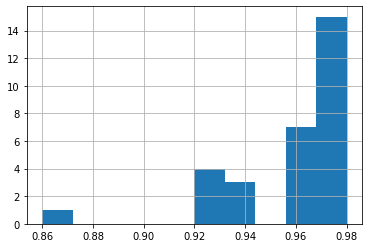

In [ ]:
df_results['recall_1'].hist()

In [ ]:
dest_file = "2013_30_iterations_15_observed.txt"
output_file = open(dest_file, 'w', encoding='utf-8')
for dic in results:
  json.dump(dic, output_file) 
  output_file.write("\n")

30 min

In [ ]:
df_results.describe()

,precision_1,recall_1,f1-score_1,precision_0,recall_0,f1-score_0
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.830979,0.932667,0.873257,0.999470,0.998347,0.998908
std,0.096795,0.052387,0.042223,0.000411,0.001127,0.000447
min,0.644737,0.760000,0.777778,0.998115,0.995751,0.997792
25%,0.775090,0.920000,0.850651,0.999370,0.997797,0.998681
50%,0.806780,0.950000,0.873864,0.999606,0.998190,0.998937
75%,0.904735,0.960000,0.905660,0.999685,0.999213,0.999213
max,0.976190,0.980000,0.938776,0.999842,0.999843,0.999528


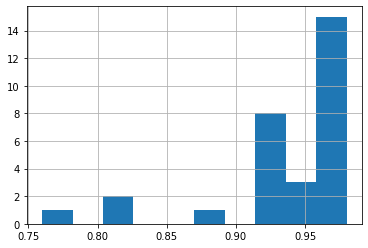

In [ ]:
df_results['recall_1'].hist()

In [ ]:
dest_file = "2013_30_iterations_30_observed.txt"
output_file = open(dest_file, 'w', encoding='utf-8')
for dic in results:
  json.dump(dic, output_file) 
  output_file.write("\n")

45 min

In [ ]:
df_results.describe()

,precision_1,recall_1,f1-score_1,precision_0,recall_0,f1-score_0
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.781025,0.942667,0.851604,0.999548,0.997854,0.998700
std,0.054650,0.052452,0.024710,0.000413,0.000719,0.000257
min,0.680556,0.820000,0.803279,0.998584,0.996380,0.998108
25%,0.748048,0.920000,0.832227,0.999369,0.997482,0.998503
50%,0.777778,0.960000,0.854369,0.999685,0.997797,0.998739
75%,0.806876,0.980000,0.867257,0.999842,0.998269,0.998878
max,0.933333,1.000000,0.912621,1.000000,0.999528,0.999292


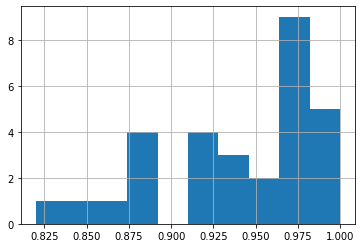

In [ ]:
df_results['recall_1'].hist()

In [ ]:
dest_file = "2013_30_iterations_45_observed.txt"
output_file = open(dest_file, 'w', encoding='utf-8')
for dic in results:
  json.dump(dic, output_file) 
  output_file.write("\n")

60 min

In [ ]:
df_results.describe()

,precision_1,recall_1,f1-score_1,precision_0,recall_0,f1-score_0
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.763398,0.886667,0.817519,0.999107,0.997786,0.998446
std,0.058012,0.080744,0.051035,0.000635,0.000735,0.000423
min,0.629032,0.620000,0.688889,0.997014,0.996380,0.997322
25%,0.746324,0.860000,0.797942,0.998898,0.997639,0.998207
50%,0.769174,0.920000,0.827258,0.999369,0.997797,0.998504
75%,0.790480,0.940000,0.846847,0.999527,0.998347,0.998720
max,0.895833,0.980000,0.915888,0.999842,0.999213,0.999291


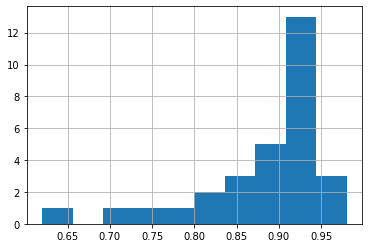

In [ ]:
df_results['recall_1'].hist()

In [ ]:
dest_file = "2013_30_iterations_60_observed.txt"
output_file = open(dest_file, 'w', encoding='utf-8')
for dic in results:
  json.dump(dic, output_file) 
  output_file.write("\n")

75 min

In [ ]:
df_results.describe()

,precision_1,recall_1,f1-score_1,precision_0,recall_0,f1-score_0
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.717981,0.844000,0.769463,0.998771,0.997235,0.998002
std,0.079142,0.084102,0.044979,0.000660,0.001151,0.000461
min,0.578313,0.580000,0.660194,0.996703,0.994491,0.997080
25%,0.653310,0.840000,0.744414,0.998739,0.996380,0.997714
50%,0.727310,0.860000,0.768743,0.998897,0.997482,0.998072
75%,0.773861,0.900000,0.809001,0.999211,0.997954,0.998346
max,0.888889,0.960000,0.841121,0.999684,0.999370,0.998661


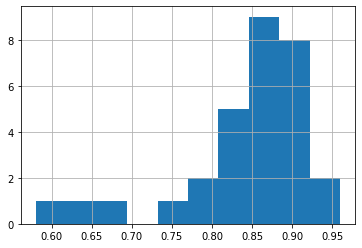

In [ ]:
df_results['recall_1'].hist()

In [ ]:
dest_file = "2013_30_iterations_75_observed.txt"
output_file = open(dest_file, 'w', encoding='utf-8')
for dic in results:
  json.dump(dic, output_file) 
  output_file.write("\n")

90 min

In [ ]:
df_results.describe()

,precision_1,recall_1,f1-score_1,precision_0,recall_0,f1-score_0
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.753942,0.836667,0.786076,0.998714,0.997660,0.998186
std,0.093411,0.072413,0.042300,0.000568,0.001258,0.000485
min,0.582278,0.640000,0.713178,0.997174,0.994806,0.997081
25%,0.688134,0.800000,0.758227,0.998427,0.996931,0.997875
50%,0.745222,0.860000,0.794455,0.998897,0.997875,0.998346
75%,0.823896,0.880000,0.811741,0.999055,0.998544,0.998584
max,0.941176,0.940000,0.862745,0.999526,0.999685,0.998898


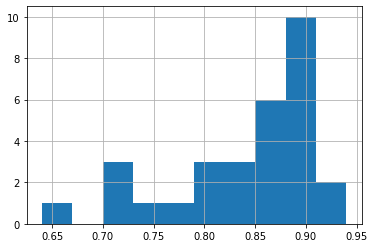

In [ ]:
df_results['recall_1'].hist()

In [ ]:
dest_file = "2013_30_iterations_90_observed.txt"
output_file = open(dest_file, 'w', encoding='utf-8')
for dic in results:
  json.dump(dic, output_file) 
  output_file.write("\n")

#Redone for viz

In [ ]:
df_results.describe()

,precision_1,recall_1,f1-score_1,precision_0,recall_0,f1-score_0
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.755717,0.827333,0.781481,0.998641,0.997702,0.998170
std,0.090765,0.094611,0.051230,0.000742,0.001296,0.000495
min,0.575000,0.520000,0.619048,0.996232,0.994648,0.997002
25%,0.700039,0.800000,0.766433,0.998426,0.997049,0.997893
50%,0.752049,0.830000,0.785607,0.998662,0.997875,0.998269
75%,0.830000,0.895000,0.819082,0.999171,0.998741,0.998563
max,0.911765,0.960000,0.854167,0.999684,0.999528,0.998899


In [ ]:
dest_file = "2013_30_iterations_90_observed_vis.txt"
output_file = open(dest_file, 'w', encoding='utf-8')
for dic in results:
  json.dump(dic, output_file) 
  output_file.write("\n")
print('done')

done


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM


#Redone for viz _ 2

In [ ]:
df_results.describe()

,precision_1,recall_1,f1-score_1,precision_0,recall_0,f1-score_0
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.769378,0.831333,0.794575,0.998672,0.997917,0.998294
std,0.077108,0.061405,0.037905,0.000482,0.001012,0.000411
min,0.594203,0.700000,0.689076,0.997641,0.995593,0.997084
25%,0.725643,0.800000,0.775090,0.998426,0.997363,0.998130
50%,0.773504,0.840000,0.800000,0.998739,0.998111,0.998347
75%,0.833789,0.860000,0.823820,0.998898,0.998819,0.998584
max,0.891304,0.940000,0.854167,0.999527,0.999213,0.998899


In [ ]:
dest_file = "2013_30_iterations_90_observed_vis_2.txt"
output_file = open(dest_file, 'w', encoding='utf-8')
for dic in results:
  json.dump(dic, output_file) 
  output_file.write("\n")
print('done')

done


105 min

In [ ]:
df_results.describe()

,precision_1,recall_1,f1-score_1,precision_0,recall_0,f1-score_0
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.783751,0.817333,0.794472,0.998562,0.998106,0.998334
std,0.074871,0.075701,0.033082,0.000594,0.000920,0.000316
min,0.626667,0.640000,0.733333,0.997173,0.995593,0.997555
25%,0.736313,0.785000,0.768201,0.998307,0.997521,0.998112
50%,0.772757,0.820000,0.800019,0.998583,0.998032,0.998386
75%,0.836932,0.875000,0.820000,0.999014,0.998898,0.998563
max,0.925000,0.940000,0.854167,0.999526,0.999528,0.998899


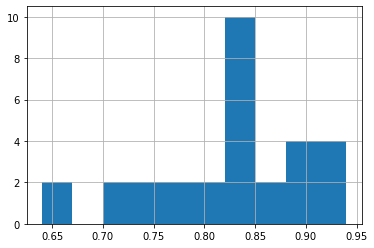

In [ ]:
df_results['recall_1'].hist()

In [ ]:
dest_file = "2013_30_iterations_105_observed.txt"
output_file = open(dest_file, 'w', encoding='utf-8')
for dic in results:
  json.dump(dic, output_file) 
  output_file.write("\n")

120 min 

In [ ]:
df_results.describe()

,precision_1,recall_1,f1-score_1,precision_0,recall_0,f1-score_0
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.789789,0.805333,0.788800,0.998469,0.998216,0.998342
std,0.060253,0.111780,0.065257,0.000875,0.000733,0.000322
min,0.672131,0.320000,0.477612,0.994676,0.996852,0.997253
25%,0.754170,0.765000,0.777261,0.998152,0.997678,0.998268
50%,0.787990,0.830000,0.796107,0.998661,0.998347,0.998347
75%,0.830556,0.860000,0.819793,0.998898,0.998741,0.998505
max,0.941176,0.940000,0.851485,0.999527,0.999843,0.998819


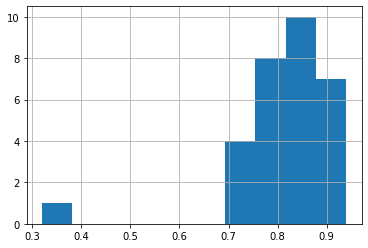

In [ ]:
df_results['recall_1'].hist()

In [ ]:
dest_file = "2013_30_iterations_120_observed.txt"
output_file = open(dest_file, 'w', encoding='utf-8')
for dic in results:
  json.dump(dic, output_file) 
  output_file.write("\n")

# Old

# 120 min lead time 

In [ ]:
print(classification_report(test_y, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6353
         1.0       0.76      0.90      0.83        50

    accuracy                           1.00      6403
   macro avg       0.88      0.95      0.91      6403
weighted avg       1.00      1.00      1.00      6403



In [ ]:
print(classification_report(test_y, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6353
         1.0       0.93      0.74      0.82        50

    accuracy                           1.00      6403
   macro avg       0.96      0.87      0.91      6403
weighted avg       1.00      1.00      1.00      6403



In [ ]:
print(classification_report(test_y, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6353
         1.0       0.80      0.82      0.81        50

    accuracy                           1.00      6403
   macro avg       0.90      0.91      0.91      6403
weighted avg       1.00      1.00      1.00      6403



# 105 min lead time 

In [ ]:
print(classification_report(test_y, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6353
         1.0       0.86      0.72      0.78        50

    accuracy                           1.00      6403
   macro avg       0.93      0.86      0.89      6403
weighted avg       1.00      1.00      1.00      6403



In [ ]:
print(classification_report(test_y, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6353
         1.0       0.68      0.90      0.78        50

    accuracy                           1.00      6403
   macro avg       0.84      0.95      0.89      6403
weighted avg       1.00      1.00      1.00      6403



# 90 min lead time 

In [ ]:
print(classification_report(test_y, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6353
         1.0       0.89      0.82      0.85        50

    accuracy                           1.00      6403
   macro avg       0.94      0.91      0.93      6403
weighted avg       1.00      1.00      1.00      6403



#  75 min lead time 

In [ ]:
print(classification_report(test_y, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6353
         1.0       0.92      0.88      0.90        50

    accuracy                           1.00      6403
   macro avg       0.96      0.94      0.95      6403
weighted avg       1.00      1.00      1.00      6403



#  60 min lead time 

In [ ]:
print(classification_report(test_y, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6354
         1.0       0.73      0.96      0.83        50

    accuracy                           1.00      6404
   macro avg       0.86      0.98      0.91      6404
weighted avg       1.00      1.00      1.00      6404



#  45 min lead time 

In [ ]:
print(classification_report(test_y, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6354
         1.0       0.75      0.90      0.82        50

    accuracy                           1.00      6404
   macro avg       0.87      0.95      0.91      6404
weighted avg       1.00      1.00      1.00      6404



#  30 min lead time 

In [ ]:
print(classification_report(test_y, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6354
         1.0       0.92      0.90      0.91        50

    accuracy                           1.00      6404
   macro avg       0.96      0.95      0.95      6404
weighted avg       1.00      1.00      1.00      6404



#  15 min lead time 

In [ ]:
print(classification_report(test_y, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6355
         1.0       0.96      0.94      0.95        50

    accuracy                           1.00      6405
   macro avg       0.98      0.97      0.97      6405
weighted avg       1.00      1.00      1.00      6405



Trial

In [ ]:
# design network
#, return_sequences= True
model = Sequential()
model.add(LSTM(40, input_shape=( train_X.shape[1], train_X.shape[2]) , return_sequences= True , recurrent_dropout= 0.1   ) )
model.add(LSTM(20 , return_sequences= True , recurrent_dropout= 0.05 ) )
model.add(LSTM(10, recurrent_dropout= 0.01 ))
#model.add(LSTM(10, recurrent_dropout= 0.05  ) ) , , recurrent_dropout= 0.15 , , recurrent_dropout= 0.05
model.add(Dense(1, activation='sigmoid',  bias_initializer=output_bias))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=metrics )
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 12, 40)            7200      
                                                                 
 lstm_13 (LSTM)              (None, 12, 20)            4880      
                                                                 
 lstm_14 (LSTM)              (None, 10)                1240      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13,331
Trainable params: 13,331
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit( train_X, train_y ,  epochs=100, batch_size= 128,  class_weight=class_weight)

Epoch 1/100
121/121 [==============================] - 10s 34ms/step - loss: 0.0237 - accuracy: 0.9942 - precision: 0.8517 - recall: 0.5460
Epoch 2/100
121/121 [==============================] - 4s 33ms/step - loss: 0.0175 - accuracy: 0.9874 - precision: 0.3086 - recall: 0.1534
Epoch 3/100
121/121 [==============================] - 4s 33ms/step - loss: 0.0143 - accuracy: 0.9879 - precision: 0.4241 - recall: 0.4110
Epoch 4/100
121/121 [==============================] - 4s 33ms/step - loss: 0.0119 - accuracy: 0.9891 - precision: 0.4882 - recall: 0.6319
Epoch 5/100
121/121 [==============================] - 4s 33ms/step - loss: 0.0135 - accuracy: 0.9876 - precision: 0.3592 - recall: 0.2270
Epoch 6/100
121/121 [==============================] - 4s 33ms/step - loss: 0.0108 - accuracy: 0.9897 - precision: 0.5104 - recall: 0.6012
Epoch 7/100
121/121 [==============================] - 4s 33ms/step - loss: 0.0135 - accuracy: 0.9868 - precision: 0.3435 - recall: 0.2761
Epoch 8/100
121/121 [=====

In [ ]:
y_pred = model.predict( test_X,  batch_size=128, verbose=1)

52/52 [==============================] - 0s 7ms/step


In [ ]:
y_pred =(y_pred>0.5)

In [ ]:
print(classification_report(test_y, y_pred)) # same as in the best 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6587
         1.0       0.88      0.74      0.81        31

    accuracy                           1.00      6618
   macro avg       0.94      0.87      0.90      6618
weighted avg       1.00      1.00      1.00      6618



In [ ]:
#defining the hyperModel
#  input_shape= inputShape to be removed 


# design network
#, return_sequences= True


from kerastuner import HyperModel
class LSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()

        model.add(
            LSTM(units=hp.Int('units_l1', 35, 45, 5, default=40), input_shape= input_shape, 
                recurrent_dropout= hp.Float('recurrent_dropout_1', min_value=0.1, max_value=0.2, default=0.1, step=0.05,) , return_sequences=True ))
           
        model.add(
            LSTM(units=hp.Int('units_l2', 15, 25, 5, default=20),
            
            recurrent_dropout= hp.Float('recurrent_dropout_2', min_value=0.05, max_value=0.15, default=0.1, step=0.05,) , return_sequences=True ))
        model.add(
            LSTM(units=hp.Int('units_l2', 5, 10, 5, default=20),
            
            recurrent_dropout= hp.Float('recurrent_dropout_2', min_value=0.05, max_value=0.1, default=0.1, step=0.05,) ))
          
        model.add(Dense(1, activation='sigmoid', bias_initializer=output_bias))

        hp_learning_rate = hp.Choice('learning_rate', values=[ 1e-2,  1e-3])
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics= metrics )
        
        return model

In [ ]:
input_shape= (train_X.shape[1], train_X.shape[2])
hypermodel = LSTMHyperModel(input_shape)


In [ ]:
input_shape

(12, 4)

In [ ]:
from kerastuner import BayesianOptimization

#stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
#stop_early,   validation_split=0.2,
#tensorboardk = keras.callbacks.TensorBoard(log_dir='/tmp/tb_logs', histogram_freq= 1 , batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

tuner_bo = BayesianOptimization(
            hypermodel,
            objective= kt.Objective("recall", direction="max") ,
            max_trials= 5,
            seed=7,
            executions_per_trial= 2 ,
            overwrite=True ,  
            directory="/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM/15min"
            )
tuner_bo.search(train_X, train_y, epochs= 100 ,  batch_size = 128  , use_multiprocessing=True  , verbose=2 )
#shuffle=False,  

Trial 5 Complete [00h 19m 46s]
recall: 0.9509202241897583

Best recall So Far: 0.953987717628479
Total elapsed time: 01h 20m 08s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Take best model 
best_model = tuner_bo.get_best_models(num_models=1)[0]
best_model.build(train_X.shape)

In [ ]:
best_model.evaluate( test_X, test_y, verbose=0)

[0.011135192587971687,
 0.9988213181495667,
 0.9666666388511658,
 0.8969072103500366]

In [ ]:
y_pred = best_model.predict( test_X,  batch_size= 256, verbose=1)

26/26 [==============================] - 1s 9ms/step


In [ ]:
y_pred =(y_pred>0.5)

# 15 min 

In [ ]:
print (best_model.get_config()) 
print( best_model.optimizer.get_config()) 
print( best_model.history.params ) 
print ( best_model.loss ) 

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 40, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6589
         1.0       1.00      0.81      0.89        31

    accuracy                           1.00      6620
   macro avg       1.00      0.90      0.95      6620
weighted avg       1.00      1.00      1.00      6620



In [ ]:
best_model.save('/content/drive/MyDrive/Colab Notebooks/ThesisExperiments/FlashFloodPredictionBenchmarkLSTM/15min')

In [ ]:
print (best_model.get_config()) 
print( best_model.optimizer.get_config()) 
print( best_model.history.params ) 
print ( best_model.loss ) 

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 42, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4393
         1.0       1.00      0.85      0.92        20

    accuracy                           1.00      4413
   macro avg       1.00      0.93      0.96      4413
weighted avg       1.00      1.00      1.00      4413



# 30 min

In [ ]:
print( best_model.get_config() ) 
print(best_model.optimizer.get_config() ) 
print(best_model.history.params ) 
print(best_model.loss ) 

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 35, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6589
         1.0       1.00      0.81      0.89        31

    accuracy                           1.00      6620
   macro avg       1.00      0.90      0.95      6620
weighted avg       1.00      1.00      1.00      6620



In [ ]:
best_model.save('')

# 45 min

In [ ]:
print( best_model.get_config())
print( best_model.optimizer.get_config())
print( best_model.history.params)
print( best_model.loss)

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 35, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6588
         1.0       0.96      0.74      0.84        31

    accuracy                           1.00      6619
   macro avg       0.98      0.87      0.92      6619
weighted avg       1.00      1.00      1.00      6619



In [ ]:
# design network
model = Sequential()
model.add(LSTM(42, input_shape=( train_X.shape[1], train_X.shape[2]) , return_sequences= True , recurrent_dropout= 0.15) )
model.add(LSTM(22, recurrent_dropout= 0.05 ) )
#model.add(LSTM(10, recurrent_dropout= 0.05  ) ) , return_sequences= True 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=metrics )
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 42)            7896      
                                                                 
 lstm_3 (LSTM)               (None, 22)                5720      
                                                                 
 dense_1 (Dense)             (None, 1)                 23        
                                                                 
Total params: 13,639
Trainable params: 13,639
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit( train_X, train_y ,  epochs=200, batch_size=  2048)

Epoch 1/200
9/9 [==============================] - 5s 89ms/step - loss: 0.6655 - accuracy: 0.9450 - precision: 0.0868 - recall: 0.5190
Epoch 2/200
9/9 [==============================] - 1s 87ms/step - loss: 0.5673 - accuracy: 0.9901 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/200
9/9 [==============================] - 1s 86ms/step - loss: 0.3586 - accuracy: 0.9901 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/200
9/9 [==============================] - 1s 86ms/step - loss: 0.1104 - accuracy: 0.9901 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/200
9/9 [==============================] - 1s 85ms/step - loss: 0.0579 - accuracy: 0.9901 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/200
9/9 [==============================] - 1s 86ms/step - loss: 0.0567 - accuracy: 0.9901 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/200
9/9 [==============================] - 1s 86ms/step - loss: 0.0565 - accuracy: 0.9901 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8

In [ ]:
y_pred = model.predict( test_X,  batch_size=128, verbose=1)

35/35 [==============================] - 1s 5ms/step


In [ ]:
y_pred =(y_pred>0.5)

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4393
         1.0       0.89      0.80      0.84        20

    accuracy                           1.00      4413
   macro avg       0.94      0.90      0.92      4413
weighted avg       1.00      1.00      1.00      4413



# 60 min

In [ ]:
print( best_model.get_config())
print( best_model.optimizer.get_config())
print( best_model.history.params)
print( best_model.loss)

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 40, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6588
         1.0       0.96      0.71      0.81        31

    accuracy                           1.00      6619
   macro avg       0.98      0.85      0.91      6619
weighted avg       1.00      1.00      1.00      6619



In [ ]:
best_model.save('')

# 75 min

In [ ]:
print ( best_model.get_config() )
print ( best_model.optimizer.get_config())
print ( best_model.history.params)
print (  best_model.loss)

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 45, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6588
         1.0       0.96      0.71      0.81        31

    accuracy                           1.00      6619
   macro avg       0.98      0.85      0.91      6619
weighted avg       1.00      1.00      1.00      6619



In [ ]:
best_model.save('')

# 90 min

In [ ]:
print ( best_model.get_config() )
print ( best_model.optimizer.get_config())
print ( best_model.history.params)
print (  best_model.loss)

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 40, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6588
         1.0       0.96      0.71      0.81        31

    accuracy                           1.00      6619
   macro avg       0.98      0.85      0.91      6619
weighted avg       1.00      1.00      1.00      6619



In [ ]:
best_model.save('')

# 105 min

In [ ]:
print ( best_model.get_config() )
print ( best_model.optimizer.get_config())
print ( best_model.history.params)
print (  best_model.loss)

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 40, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6587
         1.0       0.96      0.77      0.86        31

    accuracy                           1.00      6618
   macro avg       0.98      0.89      0.93      6618
weighted avg       1.00      1.00      1.00      6618



In [ ]:
best_model.save('')

# 120 min

In [ ]:
print ( best_model.get_config() )
print ( best_model.optimizer.get_config())
print ( best_model.history.params)
print (  best_model.loss)

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, 12, 4), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 45, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6587
         1.0       0.90      0.61      0.73        31

    accuracy                           1.00      6618
   macro avg       0.95      0.81      0.86      6618
weighted avg       1.00      1.00      1.00      6618



In [ ]:
best_model.save('')